

# Mini Project - Build a machine learning model that predicts the type of people who survived the Titanic shipwreck using passenger data (i.e. name, age, gender, socio-economic class, etc.).



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

##copyright mohit-piyush all rights reserved yayy

In [2]:
test_data=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(train.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Handling missing values

In [8]:
train['Age'].fillna(train['Age'].median(),inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

train.drop(['Cabin'],axis=1,inplace=True)

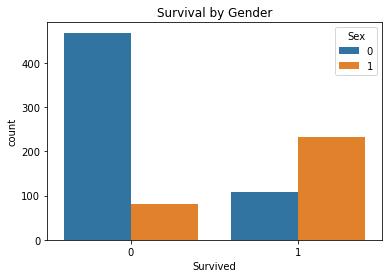

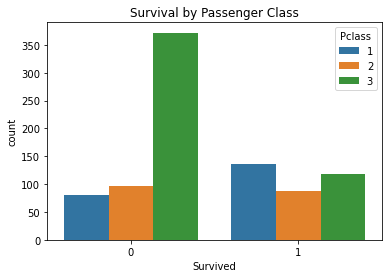

In [34]:
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival by Gender')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title('Survival by Passenger Class')
plt.show()

In [10]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Merging SibSp(number of spouses or siblings) and Parch(parent and children) into one column named FamSize(total size of the   family)

In [11]:
train['FamSize']=train['SibSp']+train['Parch']+1

In [12]:
train.drop(['SibSp','Parch','Name','Ticket'],axis=1,inplace=True)

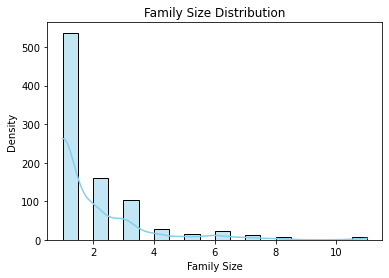

In [31]:
sns.histplot(train["FamSize"], kde=True, bins=20, color="skyblue", edgecolor="black")
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.show()


In [14]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamSize
0,1,0,3,male,22.0,7.2500,S,2
1,2,1,1,female,38.0,71.2833,C,2
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,2
4,5,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S,1
887,888,1,1,female,19.0,30.0000,S,1
888,889,0,3,female,28.0,23.4500,S,4
889,890,1,1,male,26.0,30.0000,C,1


In [15]:
train['Sex']=train['Sex'].map({'male':0,'female':1})

In [16]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamSize
0,1,0,3,0,22.0,7.2500,S,2
1,2,1,1,1,38.0,71.2833,C,2
2,3,1,3,1,26.0,7.9250,S,1
3,4,1,1,1,35.0,53.1000,S,2
4,5,0,3,0,35.0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,S,1
887,888,1,1,1,19.0,30.0000,S,1
888,889,0,3,1,28.0,23.4500,S,4
889,890,1,1,0,26.0,30.0000,C,1


In [17]:
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)


In [18]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamSize,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,7.2500,2,0,1
1,2,1,1,1,38.0,71.2833,2,0,0
2,3,1,3,1,26.0,7.9250,1,0,1
3,4,1,1,1,35.0,53.1000,2,0,1
4,5,0,3,0,35.0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,1,0,1
887,888,1,1,1,19.0,30.0000,1,0,1
888,889,0,3,1,28.0,23.4500,4,0,1
889,890,1,1,0,26.0,30.0000,1,0,0


In [19]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [20]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=220, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_val, y_pred))




Validation Accuracy: 0.8268156424581006


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [120,170,220],
    'max_depth': [5, 10, 15],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search.best_params_)


Best parameters for Random Forest: {'max_depth': 5, 'n_estimators': 220}


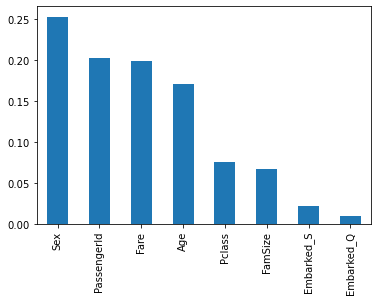

In [23]:
importances = model.feature_importances_
features = pd.Series(importances, index=X_train.columns)
features.sort_values(ascending=False).plot(kind='bar')
plt.show()

# PREPROCESSING OF TEST DATASET

In [24]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

test_data= pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

In [25]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,1,1,0
1,893,3,1,47.0,1,0,7.0000,2,0,1
2,894,2,0,62.0,0,0,9.6875,1,1,0
3,895,3,0,27.0,0,0,8.6625,1,0,1
4,896,3,1,22.0,1,1,12.2875,3,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,1,0,1
414,1306,1,1,39.0,0,0,108.9000,1,0,0
415,1307,3,0,38.5,0,0,7.2500,1,0,1
416,1308,3,0,27.0,0,0,8.0500,1,0,1


In [26]:
test_data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [27]:
test_predictions = model.predict(test_data)

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

# Save the submission to a CSV file
submission.to_csv('titanic_submission.csv', index=False)
print("\nSubmission file 'titanic_submission.csv' created!")



Submission file 'titanic_submission.csv' created!


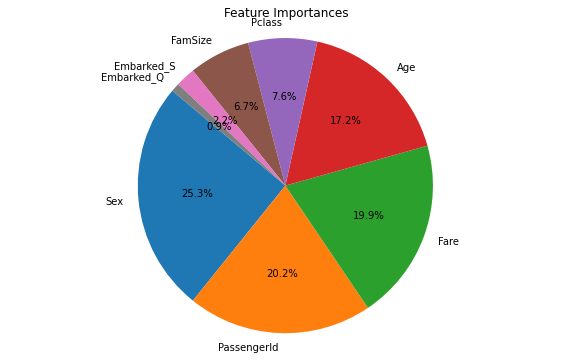

In [28]:
# Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(features.sort_values(ascending=False), labels=features.sort_values(ascending=False).index, autopct='%1.1f%%', startangle=140)
plt.title('Feature Importances')
plt.axis('equal')
plt.show()


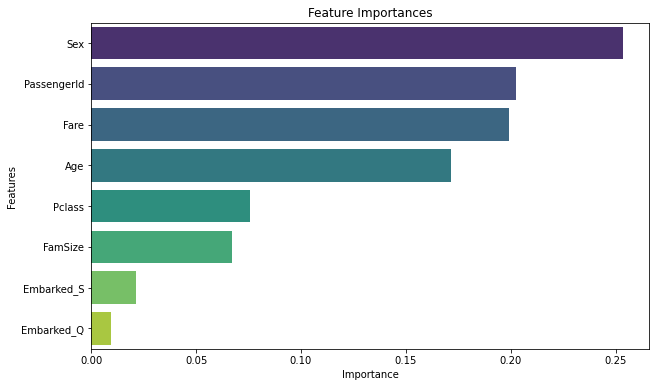

In [29]:
import seaborn as sns

# Seaborn Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=features.sort_values(ascending=False), y=features.sort_values(ascending=False).index, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
